# Arrays of school expenditure data for Washington, DC
## For Edunomics Lab

By: Jaren Haber, PhD, MDI Postdoc  
Date: August 29, 2020

## Initialize & read data

In [1]:
# Import packages
import pandas as pd
import seaborn as sns
from nltk import word_tokenize
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import openpyxl
import sys

# Set visualization options
sns.set(style="white")

In [41]:
# Define file locations
expenditures_file = "2019 DC School Report Card Per-Pupil Expenditures.xlsx"
publicdata_file = "2019 DC School Report Card Aggregate Public Data.xlsx"

# Define expenditure columns to keep
keepcols = ["School Code",
            "Total Per-Pupil Expenditure", "School Expenditures: State/Local", "School Expenditures: Federal", 
            "Centralized Expenditures", "Centralized Expenditures: State/Local", "Centralized Expenditures: Federal", 
            "Total School Level Expenditure", "School Level: State/Local", "School Level: Federal"]

In [3]:
# Read excel files, keep only relevant sheets
exp_df1 = pd.read_excel(expenditures_file, sheet_name="Multi-Site School Finance", header=1, usecols=keepcols)#, dtype="int64")
exp_df2 = pd.read_excel(expenditures_file, sheet_name="Single-Site School Finance", header=1, usecols=keepcols)#, dtype="int64")
agg_df = pd.read_excel(publicdata_file, sheet_name="Enrollment")
frame_df = pd.read_excel(publicdata_file, sheet_name="STAR Framework Scores") # This has the "Accountability Framework" column used as primary means of detecting school level/grade range

In [4]:
print("Number rows:", str(len(exp_df1)))
exp_df1.head(10)

Number rows: 188


,School Code,Total Per-Pupil Expenditure,School Expenditures: State/Local,School Expenditures: Federal,Total School Level Expenditure,School Level: State/Local,School Level: Federal,Centralized Expenditures,Centralized Expenditures: State/Local,Centralized Expenditures: Federal
0,175,20573,18759,1814,13698,13382,316,6875,5377,1498
1,202,20775,17827,2948,13900,12450,1451,6875,5377,1498
2,203,19992,17609,2383,13117,12231,886,6875,5377,1498
3,204,20840,18501,2340,13965,13123,842,6875,5377,1498
4,205,21210,18738,2472,14335,13361,974,6875,5377,1498
5,206,20598,17782,2816,13723,12404,1318,6875,5377,1498
6,212,16933,15183,1750,10058,9805,252,6875,5377,1498
7,213,20682,18419,2263,13807,13041,766,6875,5377,1498
8,219,21933,19037,2896,15058,13660,1398,6875,5377,1498
9,220,23352,20873,2479,16477,15496,981,6875,5377,1498


In [5]:
print("Number rows:", str(len(agg_df)))
agg_df.head(10)

Number rows: 4886


,LEA Code,LEA Name,School Code,School Name,Entity Type,Ward,Student Group,Grade,Percent Enrolled,Enrollment Count,Total Count of Students
0,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,All Report Card Students,1,15,49.0,320
1,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,All Report Card Students,2,13,42.0,320
2,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,All Report Card Students,3,14,44.0,320
3,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,All Report Card Students,4,13,43.0,320
4,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,All Report Card Students,5,5,16.0,320
5,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,All Report Card Students,KG,14,45.0,320
6,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,All Report Card Students,PK3,12,38.0,320
7,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,All Report Card Students,PK4,13,43.0,320
8,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,American Indian/Alaskan Native,All,0,NaN,320
9,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,Asian,All,2,NaN,320


In [6]:
print("Number rows:", str(len(frame_df)))
frame_df.head(10)

Number rows: 251


,LEA Code,LEA Name,School Code,School Name,School Type,Ward,Accountability Framework,Framework Weight,Framework Points Earned,Framework Points Possible,Framework STAR Score,Framework STAR Rating,School Year
0,1,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,Elementary School with Pre-Kindergarten,100.00,79.43,90.0,88.26,5,2019
1,1,District of Columbia Public Schools,202,Aiton Elementary School,DCPS,7,Elementary School with Pre-Kindergarten,100.00,10.25,95.0,10.79,1,2019
2,1,District of Columbia Public Schools,203,Amidon-Bowen Elementary School,DCPS,6,Elementary School with Pre-Kindergarten,100.00,46.11,95.0,48.54,3,2019
3,1,District of Columbia Public Schools,204,Bancroft Elementary School @ Sharpe,DCPS,1,Elementary School with Pre-Kindergarten,100.00,83.01,100.0,83.01,5,2019
4,1,District of Columbia Public Schools,205,Barnard Elementary School,DCPS,4,Elementary School with Pre-Kindergarten,100.00,73.18,100.0,73.18,4,2019
5,1,District of Columbia Public Schools,206,Beers Elementary School,DCPS,7,Elementary School with Pre-Kindergarten,100.00,36.74,95.0,38.68,2,2019
6,1,District of Columbia Public Schools,212,Brent Elementary School,DCPS,6,Elementary School with Pre-Kindergarten,100.00,65.19,80.0,81.49,5,2019
7,1,District of Columbia Public Schools,213,Brightwood Education Campus,DCPS,4,Elementary School with Pre-Kindergarten,57.25,64.81,100.0,64.81,4,2019
8,1,District of Columbia Public Schools,213,Brightwood Education Campus,DCPS,4,Middle School,42.75,46.89,100.0,46.89,3,2019
9,1,District of Columbia Public Schools,219,Bunker Hill Elementary School,DCPS,5,Elementary School with Pre-Kindergarten,100.00,29.51,85.0,34.72,2,2019


# Prepare data

## Clean 'School Name' and 'School Code' columns

In [7]:
print("Original number of rows:", len(agg_df))

# Drop rows where School Code (used for matching) is "All", as in charter networks
agg_df.drop(agg_df.loc[agg_df["School Code"]=="All"].index, inplace=True)
print("Number rows after dropping 'All' names:", len(agg_df))

Original number of rows: 4886
Number rows after dropping 'All' names: 4400


In [8]:
# Make sure School Name not missing data or incorrect type
agg_df["School Name"] = agg_df["School Name"].astype("str")

In [9]:
# Make new column with first two words of School Name, for clear naming of visuals
agg_df["Short Name"] = agg_df["School Name"].apply(
    lambda x: " ".join(x.split()[:5])) #if not np.isnan(x) else x) #(len(str(x))>0)
agg_df["Short Name"].head(20)

0     School-Within-School @ Goding
1     School-Within-School @ Goding
2     School-Within-School @ Goding
3     School-Within-School @ Goding
4     School-Within-School @ Goding
5     School-Within-School @ Goding
6     School-Within-School @ Goding
7     School-Within-School @ Goding
8     School-Within-School @ Goding
9     School-Within-School @ Goding
10    School-Within-School @ Goding
11    School-Within-School @ Goding
12    School-Within-School @ Goding
13    School-Within-School @ Goding
14    School-Within-School @ Goding
15    School-Within-School @ Goding
16    School-Within-School @ Goding
17    School-Within-School @ Goding
18    School-Within-School @ Goding
19    School-Within-School @ Goding
Name: Short Name, dtype: object

In [10]:
# Check data types for School Code
print(type(agg_df["School Code"].iloc[0]))
print(type(exp_df1["School Code"].iloc[0]))
print(type(exp_df2["School Code"].iloc[0]))

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [11]:
# Coerce data type for "School Code" to int64
agg_df["School Code"] = agg_df["School Code"].astype("int64") #.apply(lambda x: f'{float(x):g}')
print(type(agg_df["School Code"].iloc[0]))

frame_df["School Code"] = frame_df["School Code"].astype("int64")
print(type(frame_df["School Code"].iloc[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>


In [12]:
# Clean and prep framework columns
frame_df = frame_df[["Accountability Framework", "School Code"]] # keep only relevant columns

frame_df.replace(
    to_replace = ["Elementary School with Pre-Kindergarten", "Elementary School without Pre-Kindergarten"], 
    value = "Elementary School", inplace=True)

print("Types of Accountability Framework/School Level in cleaned data and their counts:\n", 
      frame_df["Accountability Framework"].value_counts())

Types of Accountability Framework/School Level in cleaned data and their counts:
 Elementary School        138
Middle School             73
High School               34
Alternative Framework      6
Name: Accountability Framework, dtype: int64


## Determine each school's highest and lowest grade served

In [13]:
def convert_grade (grade):
    """
    Used to help detect grade range in school data indicating grade using both character (e.g., PK3) and numeric (e.g., 4) formats/dtypes. 
    For comparison purposes, converts non-numeric grades (pre-K, Adult) to numeric to be on same scale as others (i.e., 1, 2, 3...).
    Uses baseline of zero (0) for kindergarten., -1 for pre-K (4-year olds), -2 for pre-K (3-year olds), and 13 for Adults.
    
    input: cell/element indicating grade for a school or enrolled group
    output: cell converted to numeric equivalent
    """
    
    numeric = 0 # initialize
    
    # Convert to numeric:
    if grade == "KG":
        numeric = 0
    elif grade == "PK4":
        numeric = -1
    elif grade == "PK3":
        numeric = -2
    elif grade == "Adult":
        numeric = 13
    elif grade == "All":
        numeric = np.nan
    
    # If a numeric grade already, make sure it's of integer dtype:
    else:
        numeric = int(grade)
        
    return numeric

In [14]:
# Filter out "All" grades using a whitelist (built into convert_grade() above)
#gradeslist = ['KG','PK3','PK4','1','2','3','4','5','6','7','8','9','10','11','12','Adult'] + list(range(1,12)) # Define whitelist
#agg_df = agg_df[agg_df["Grade"].isin(gradeslist)] # Apply whitelist

agg_df["Grade"] = agg_df["Grade"].apply(lambda x: convert_grade(x)) # Convert chars to single numeric scale

#print("Number rows in 'Grade' column after filtering out rows indicating 'All':", str(len(agg_df)))
print("What 'Grade' column looks like after replacing chars with numeric equivalents:") # removing 'All' and
agg_df["Grade"].head(20)

What 'Grade' column looks like after replacing chars with numeric equivalents:


0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     0.0
6    -2.0
7    -1.0
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Grade, dtype: float64

In [15]:
# Calculate lowest and highest grades per school via School Code
#grouped = agg_df[agg_df["Grade"].apply(lambda x: x[0].isdigit())] # Filter by only numeric grades to prep for grouping (done above)
grouped = agg_df.groupby(by=agg_df["School Code"], axis=0) # Group by school code
maxgrades = grouped["Grade"].max().rename(columns={"Grade":"Highest Grade"}) # highest grade

mingrades = grouped["Grade"].min().rename(columns={"Grade":"Lowest Grade"}) # lowest grade

print("Number of values for highest grade per school:", len(maxgrades))
print("What highest grades look like:")
print(maxgrades.head(10))
print()
print("Number of values for lowest grade per school:", len(mingrades))
print("What highest grades look like:")
print(mingrades.head(10))

Number of values for highest grade per school: 229
What highest grades look like:
School Code
101    12.0
102     8.0
104    13.0
109    12.0
113     3.0
114     8.0
115     8.0
116     8.0
121     8.0
125     8.0
dtype: float64

Number of values for lowest grade per school: 229
What highest grades look like:
School Code
101     9.0
102     7.0
104    13.0
109     9.0
113    -2.0
114    -2.0
115     6.0
116     5.0
121     5.0
125     5.0
dtype: float64


## Filter and Merge into single DataFrame

In [16]:
print("Current number of rows:", len(agg_df))

# Drop rows other than where Student Group is "At Risk"--also has total counts
agg_df.drop(agg_df.loc[agg_df["Student Group"]!="At-Risk"].index, inplace=True)
print("Number rows after dropping rows other than 'At-Risk':", len(agg_df))

Current number of rows: 4400
Number rows after dropping rows other than 'At-Risk': 229


In [17]:
# Merge DFs
exp_df_merged = pd.concat([exp_df1, exp_df2], join="outer") # merge school lists of spending data
df = pd.merge(agg_df, exp_df_merged, how="inner", on="School Code") # merge spending data into enrollment data
df = pd.merge(df, maxgrades.rename("Highest Grade"), how="inner", on="School Code") # merge in max grades
df = pd.merge(df, mingrades.rename("Lowest Grade"), how="inner", on="School Code") # merge in min grades
df = pd.merge(df, frame_df, how="inner", on="School Code") # merge in scoring framework (index of grade level)
df

,LEA Code,LEA Name,School Code,School Name,Entity Type,Ward,Student Group,Grade,Percent Enrolled,Enrollment Count,...,School Expenditures: Federal,Total School Level Expenditure,School Level: State/Local,School Level: Federal,Centralized Expenditures,Centralized Expenditures: State/Local,Centralized Expenditures: Federal,Highest Grade,Lowest Grade,Accountability Framework
0,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,At-Risk,NaN,5,NaN,...,1814,13698.0,13382.0,316.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School
1,001,District of Columbia Public Schools,202,Aiton Elementary School,DCPS,7,At-Risk,NaN,76,NaN,...,2948,13900.0,12450.0,1451.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School
2,001,District of Columbia Public Schools,203,Amidon-Bowen Elementary School,DCPS,6,At-Risk,NaN,63,NaN,...,2383,13117.0,12231.0,886.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School
3,001,District of Columbia Public Schools,204,Bancroft Elementary School,DCPS,1,At-Risk,NaN,25,NaN,...,2340,13965.0,13123.0,842.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School
4,001,District of Columbia Public Schools,205,Barnard Elementary School,DCPS,4,At-Risk,NaN,46,NaN,...,2472,14335.0,13361.0,974.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School
5,001,District of Columbia Public Schools,206,Beers Elementary School,DCPS,7,At-Risk,NaN,55,NaN,...,2816,13723.0,12404.0,1318.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School
6,001,District of Columbia Public Schools,212,Brent Elementary School,DCPS,6,At-Risk,NaN,4,NaN,...,1750,10058.0,9805.0,252.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School
7,001,District of Columbia Public Schools,213,Brightwood Education Campus,DCPS,4,At-Risk,NaN,36,NaN,...,2263,13807.0,13041.0,766.0,6875.0,5377.0,1498.0,8.0,-2.0,Elementary School
8,001,District of Columbia Public Schools,213,Brightwood Education Campus,DCPS,4,At-Risk,NaN,36,NaN,...,2263,13807.0,13041.0,766.0,6875.0,5377.0,1498.0,8.0,-2.0,Middle School
9,001,District of Columbia Public Schools,219,Bunker Hill Elementary School,DCPS,5,At-Risk,NaN,45,NaN,...,2896,15058.0,13660.0,1398.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School


In [18]:
# Remove duplicates
print("Number of duplicate rows: " + str(len(df) - len(df.drop_duplicates(subset=["School Code", "School Name"]))))
df = df.drop_duplicates(subset=["School Code", "School Name"])
print("Duplicates removed -> now " + str(len(df)) + " rows.")

Number of duplicate rows: 41
Duplicates removed -> now 200 rows.


## Determine School Level and Validate

In [19]:
def get_level (lowgrade, highgrade) :
    """Induce school level given a school's lowest and highest grade served."""
    
    level = "" # initialize
    lowgrade, highgrade = int(lowgrade), int(highgrade) # Convert to int
    
    # Determine Preschool/Kindergarten Level
    #if lowgrade <= -1 and highgrade <= 2:
    #    level = "Preschool/Kindergarten"
    #elif lowgrade == -2 and highgrade <= 3:
    #    level = "Preschool/Kindergarten"
        
    # Determine Elementary/K-8 Level
    if highgrade <= 6:
        level = "Elementary School"
    elif lowgrade <= 1 and highgrade >= 7:
        level = "K-8 School"
        
    # Determine Middle/High Level
    elif lowgrade >= 4 and highgrade <= 9:
        level = "Middle School"
    elif lowgrade >= 8:
        level = "High School"
    elif lowgrade >= 5 and highgrade >= 11:
        level = "High School"
    
    return level

In [20]:
df["Level"] = df.apply(lambda x: get_level(x["Lowest Grade"], x["Highest Grade"]), axis=1)
df["Level"].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Elementary School    100
High School           36
Middle School         33
K-8 School            31
Name: Level, dtype: int64

In [21]:
# Look at current state of data on grade level
df[["School Name", "Lowest Grade", "Highest Grade", "Accountability Framework", "Level"]].sort_values(
    by="Accountability Framework", ascending = True)

,School Name,Lowest Grade,Highest Grade,Accountability Framework,Level
235,The Children's Guild PCS,0.0,8.0,Alternative Framework,K-8 School
124,Washington Metropolitan High School,8.0,12.0,Alternative Framework,High School
115,Roosevelt STAY High School,9.0,13.0,Alternative Framework,High School
232,Monument Academy PCS,5.0,8.0,Alternative Framework,Middle School
183,Maya Angelou PCS - High School,9.0,12.0,Alternative Framework,High School
234,Kingsman Academy PCS,6.0,12.0,Alternative Framework,High School
215,Inspired Teaching Demonstration PCS,-2.0,8.0,Elementary School,K-8 School
213,Washington Yu Ying PCS,-2.0,5.0,Elementary School,Elementary School
239,Statesman College Preparatory Academy for Boys...,4.0,4.0,Elementary School,Elementary School
211,Center City PCS - Trinidad,-2.0,8.0,Elementary School,K-8 School


In [22]:
# Remove empty/obsolete columns
df.drop(columns = ["Grade", "Enrollment Count", "Student Group"], inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
print("List of columns in final DF:")
list(df)

List of columns in final DF:


['LEA Code',
 'LEA Name',
 'School Code',
 'School Name',
 'Entity Type',
 'Ward',
 'Percent Enrolled',
 'Total Count of Students',
 'Short Name',
 'Total Per-Pupil Expenditure',
 'School Expenditures: State/Local',
 'School Expenditures: Federal',
 'Total School Level Expenditure',
 'School Level: State/Local',
 'School Level: Federal',
 'Centralized Expenditures',
 'Centralized Expenditures: State/Local',
 'Centralized Expenditures: Federal',
 'Highest Grade',
 'Lowest Grade',
 'Accountability Framework',
 'Level']

In [24]:
# Check data integrity
print("Number WITH finance data:", len(df[df["Total Per-Pupil Expenditure"].notnull()]))
print("Number missing finance data:", len(df[df["Total Per-Pupil Expenditure"].isnull()]))

Number WITH finance data: 200
Number missing finance data: 0


## Save data

In [36]:
df.to_csv("DC_expenditures_enrollments_FY19.csv", index=False)
df.to_excel("DC_expenditures_enrollments_FY19.xlsx", index=False)

# Visualizations

## Helpful visualization functions

In [25]:
def third_largest(dfcol):
    """
    Finds third, second, and largest element in input array.
    
    Inputs:
    dfcol: column of a DataFrame (i.e., a series)
    
    Outputs:
    third: third largest element in column
    second: second largest
    first: largest
    
    Source credit: https://www.geeksforgeeks.org/third-largest-element-array-distinct-elements/
    """
    
    col_size = len(dfcol) # find number of elements in array
      
    # Initialize first, second, and third Largest element 
    first = dfcol.iloc[0] 
    second = -sys.maxsize 
    third = -sys.maxsize 
    
    # Traverse array elements to find the third Largest:
    for i in range(1, col_size): 
          
        # If current element is greater than first, then update first, second, and third  
        if (dfcol.iloc[i] > first): 
            third = second 
            second = first 
            first = dfcol.iloc[i] 
          
        # If arr[i] is in between first and second, then update third and second
        elif (dfcol.iloc[i] > second): 
            third = second 
            second = dfcol.iloc[i] 
          
        # If arr[i] is in between second and third, then update third
        elif (dfcol.iloc[i] > third): 
            third = dfcol.iloc[i]
            
    return third,second,first

In [26]:
def third_smallest(dfcol):
    """
    Finds third, second, and smallest element in input array.
    
    Inputs:
    dfcol: column of a DataFrame (i.e., a series)
    
    Outputs:
    third: third smallest element in array
    second: second smallest
    first: smallest
    """
    
    col_size = len(dfcol) # find number of elements in array/series
      
    # Initialize first, second, and third smallest element 
    first = dfcol.iloc[0] 
    second = sys.maxsize 
    third = sys.maxsize 
    
    # Traverse array elements to find the third Largest:
    for i in range(1, col_size): 
          
        # If current element is less than first, then make it first and push others down one slot
        if (dfcol.iloc[i] < first): 
            third = second 
            second = first 
            first = dfcol.iloc[i] 
          
        # If arr[i] is in between first and second, then make it second and push previous second to third
        elif (dfcol.iloc[i] < second): 
            third = second 
            second = dfcol.iloc[i] 
          
        # If arr[i] is in between second and third, then make it third (forget previous third)
        elif (dfcol.iloc[i] < third): 
            third = dfcol.iloc[i]
            
    return third,second,first

## Simple graphs of per-pupil spending

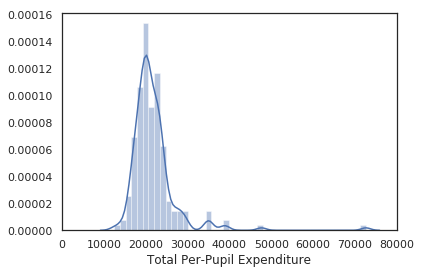

In [27]:
# Simple probability distribution of spending data
ax = sns.distplot(df["Total Per-Pupil Expenditure"])
ax.set(xlim=(0,80000))
plt.show()

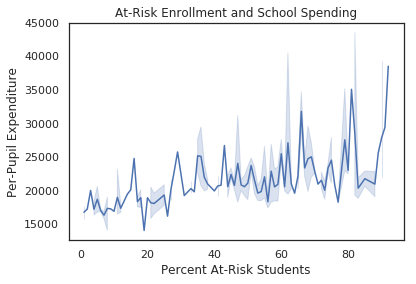

In [28]:
ax = sns.lineplot(x = "Percent Enrolled", y = "Total Per-Pupil Expenditure", data = df, color = "b")
ax.set(xlabel = "Percent At-Risk Students", ylabel = "Per-Pupil Expenditure")
ax.set_title("At-Risk Enrollment and School Spending")
plt.show()

## Visualize by grade level

### Split by charter school/traditional public school

In [63]:
# Separate DF into charter vs. not
charter = df[(df["Entity Type"] == "Charter") | (df["Entity Type"] == "Charter (Alternative)")]
tps = df[(df["Entity Type"] == "DCPS") | (df["Entity Type"] == "DCPS (Alternative)")]

print("Number of charter schools:", str(len(charter)))
print("Number of TPSs:", str(len(tps)))

Number of charter schools: 91
Number of TPSs: 109


In [64]:
charter["Level"].value_counts()

Elementary School    37
Middle School        20
High School          18
K-8 School           16
Name: Level, dtype: int64

In [65]:
tps["Level"].value_counts()

Elementary School    63
High School          18
K-8 School           15
Middle School        13
Name: Level, dtype: int64

### Split by grade level (K-8/Elem/Middle/High)--and Elem by spending level

In [67]:
# Separate each DF into Elementary, K-8, Middle, High levels
elem_tps = tps[tps["Level"]=="Elementary School"].reset_index(drop=True)
k8_tps = tps[tps["Level"]=="K-8 School"].reset_index(drop=True)
middle_tps = tps[tps["Level"]=="Middle School"].reset_index(drop=True)
high_tps = tps[tps["Level"]=="High School"].reset_index(drop=True)

elem_ch = charter[charter["Level"]=="Elementary School"].reset_index(drop=True)
k8_ch = charter[charter["Level"]=="K-8 School"].reset_index(drop=True)
middle_ch = charter[charter["Level"]=="Middle School"].reset_index(drop=True)
high_ch = charter[charter["Level"]=="High School"].reset_index(drop=True)

# Break down TPS elementary schools into two spending categories: low (< median) and high (>= median)
elem_tps_avg = elem_tps["Total Per-Pupil Expenditure"].median()
elem_tps_low = elem_tps[elem_tps["Total Per-Pupil Expenditure"] < elem_tps_avg].reset_index(drop=True)
elem_tps_hi = elem_tps[elem_tps["Total Per-Pupil Expenditure"] >= elem_tps_avg].reset_index(drop=True)

elem_tps_hi

,LEA Code,LEA Name,School Code,School Name,Entity Type,Ward,Percent Enrolled,Total Count of Students,Short Name,Total Per-Pupil Expenditure,...,School Level: State/Local,School Level: Federal,Centralized Expenditures,Centralized Expenditures: State/Local,Centralized Expenditures: Federal,Highest Grade,Lowest Grade,Accountability Framework,Level,temp
0,001,District of Columbia Public Schools,202,Aiton Elementary School,DCPS,7,76,268,Aiton Elementary School,20775,...,12450.0,1451.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School,Elementary School,DCPS
1,001,District of Columbia Public Schools,204,Bancroft Elementary School,DCPS,1,25,591,Bancroft Elementary School,20840,...,13123.0,842.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School,Elementary School,DCPS
2,001,District of Columbia Public Schools,205,Barnard Elementary School,DCPS,4,46,700,Barnard Elementary School,21210,...,13361.0,974.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School,Elementary School,DCPS
3,001,District of Columbia Public Schools,219,Bunker Hill Elementary School,DCPS,5,45,259,Bunker Hill Elementary School,21933,...,13660.0,1398.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School,Elementary School,DCPS
4,001,District of Columbia Public Schools,220,Burroughs Elementary School,DCPS,5,45,301,Burroughs Elementary School,23352,...,15496.0,981.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School,Elementary School,DCPS
5,001,District of Columbia Public Schools,224,Cleveland Elementary School,DCPS,1,51,323,Cleveland Elementary School,22738,...,14965.0,899.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School,Elementary School,DCPS
6,001,District of Columbia Public Schools,227,H.D. Cooke Elementary School,DCPS,1,44,426,H.D. Cooke Elementary School,22164,...,14512.0,777.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School,Elementary School,DCPS
7,001,District of Columbia Public Schools,231,Drew Elementary School,DCPS,7,74,280,Drew Elementary School,22743,...,14322.0,1547.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School,Elementary School,DCPS
8,001,District of Columbia Public Schools,238,Garfield Elementary School,DCPS,8,83,326,Garfield Elementary School,22386,...,14571.0,940.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School,Elementary School,DCPS
9,001,District of Columbia Public Schools,239,Garrison Elementary School,DCPS,2,38,307,Garrison Elementary School,21141,...,13403.0,863.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School,Elementary School,DCPS


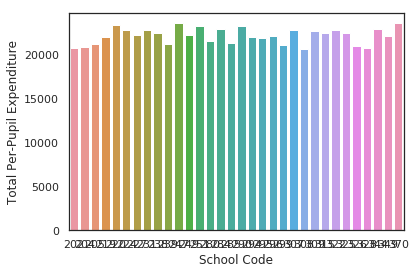

In [68]:
# Simple bar plot of spending
ax = sns.barplot(x = "School Code", y = "Total Per-Pupil Expenditure", data = elem_tps_hi)
plt.show()

### Bar plots

In [120]:
def makegraph(merged_df, 
              idcol = "School Name", 
              totalcol = "Total Per-Pupil Expenditure", 
              statecol = "School Expenditures: State/Local", 
              enrollcol = "Percent Enrolled", 
              title = "District of Columbia Per-Pupil Expenditures FY19", 
              short_title = "DC Per-Pupil Expenditures", 
              subtitle = "", 
              high_color = "crimson", 
              low_color = "violet", 
              maxheight = 0, 
              size = (20, 10)):
    
    """
    Use DF with school spending data and economic disadvantage/at-risk to make nice bar plots.
    Only REQUIRED argument is merged_df. Also good idea to specify subtitle for distinct file names.
    
    Inputs:
    merged_df: DataFrame (DF) with school spending data at both total (federal + state) and state levels
    idcol: DF column to use to name x-axis
    totalcol: DF column indicating total per-pupil expenditures by schools, including both federal + state 
    statecol: DF column indicating state-provided per-pupil expenditures by schools
    enrollcol: DF column indicating percent At-Risk (or similar group) enrolled
    title: full title to use for bar plot (not used)
    short_title: short title for bar plot (default)
    subtitle: secondary title for bar plot (after short_title)
    high_color: matplotlib-recognized color for three schools with highest % students At-Risk/in poverty
    low_color: matplotlib-recognized color for three schools with lowest % students At-Risk/in poverty
    maxheight: maximum height of bar graph (on y-axis). If not set, defaults to 1.15*highest value of totalcol
    size: size of barplot - default is plenty big.
    
    Outputs:
    Displays a nice bar plot and saves to disk.
    
    Reference:
    matplotlib colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
    """
    
    
    f, ax = plt.subplots(figsize=size) # initialize
    
    # Get spending extremes
    topscore = merged_df[totalcol].max()
    bottomscore = merged_df[totalcol].min()
    
    # Get At-Risk extremes
    third_fromtop,second_fromtop,top = third_largest(merged_df[enrollcol])
    third_frombottom,second_frombottom,bottom = third_smallest(merged_df[enrollcol])
    
    # Set colors: Red if highest % students in poverty, pink if lowest, default otherwise
    # Can uncomment else statements if we want different colors for highest vs. second and third highest (same for lowest)
    totalclrs = [high_color if (x >= third_fromtop) 
                 #else high_color if (x == second_fromtop) 
                 #else high_color if (x == third_fromtop) 
                 else low_color if (x <= third_frombottom) 
                 #else low_color if (x == second_frombottom) 
                 #else low_color if (x == bottom) 
                 else "goldenrod" 
                 for x in merged_df.sort_values(totalcol)[enrollcol]]
    stateclrs = [high_color if (x >= third_fromtop) 
                 #else high_color if (x == second_fromtop) 
                 #else high_color if (x == third_fromtop) 
                 else low_color if (x <= third_frombottom) 
                 #else low_color if (x == second_frombottom) 
                 #else low_color if (x == bottom) 
                 else "b" 
                 for x in merged_df.sort_values(totalcol)[enrollcol]]
    #sns.set_color_codes("pastel")
    
    # Plot total (remaining sliver of difference from state $ will be federal $)
    splot = sns.barplot(x = idcol, y = totalcol, data = merged_df, order = merged_df.sort_values(totalcol)[idcol], 
                label = "Per Pupil Federal $", palette=totalclrs, ci=None) #color="goldenrod"
    
    # Annotate bar plot woth bar values
    notepad = max((1700), (.06*topscore)) # set buffer for bar values
    for p in splot.patches:
        splot.annotate("$"+str("{:,.0f}".format(p.get_height(), ".0f")), 
                       (p.get_x() + p.get_width() / 2., p.get_height()+notepad), 
                       ha = "center", va = "center", 
                       xytext = (0, 9), 
                       color = "b", 
                       rotation = 90, 
                       fontsize = 14, 
                       textcoords = "offset points")
    
    #for index, row in merged_df.iterrows():
    #    ax.text(row.name, row[spendcol]+(.14*topscore), ("$" + str("{:,.0f}".format(
    #        round(row[spendcol],2)))), 
    #        color="b", ha="center", va="top", rotation=90, fontsize=14)
    
    # Plot state $
    sns.barplot(x = idcol, y = statecol, data = merged_df, order = merged_df.sort_values(totalcol)[idcol], 
                label = "Per Pupil State & Local $", palette=stateclrs, ci=None) #color="b"
    
    # Add custom legend
    gold_patch = mpatches.Patch(color='goldenrod', label="Per Pupil Federal $")
    blue_patch = mpatches.Patch(color='b', label="Per Pupil State & Local $")
    low_patch = mpatches.Patch(color=low_color, label="Lowest % At-Risk Students")
    high_patch = mpatches.Patch(color=high_color, label="Highest % At-Risk Students")
    ax.legend(handles=[gold_patch,blue_patch,low_patch,high_patch], ncol=4, loc="upper left", frameon = True, fontsize=14, edgecolor="b")
    
    # Add axis labels, set ylim
    if maxheight == 0: # Use default max height if not set
        ax.set(ylabel="", xlabel = "", ylim=(0,1.15*topscore)) #xlabel=idcol
    else:
        ax.set(ylabel="", xlabel = "", ylim=(0,maxheight)) #xlabel=idcol
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    if len(subtitle) > 0:
        ax.set_title(title + ": " + subtitle, fontsize=18, pad=15)
    else:
        ax.set_title(title, fontsize=18, pad=15)
    
    # Add summary notes at top left
    props = dict(boxstyle="square", facecolor="white", edgecolor="b", alpha=0.5) # format text box
    
    # Define text to go in box
    textstr = (("Gap between highest and lowest per-pupil expenditures = $" + (str('{:,.0f}'.format(
        topscore - bottomscore))))  + "\n" + 
               ("Average total per-pupil expenditures = $" + str('{:,.0f}'.format(round(merged_df[totalcol].mean(),0)))) + "\n" + 
               ("Lowest three % At-Risk students = " + str(bottom) + "%, " + str(second_frombottom) + "%, " + str(third_frombottom)) + "%\n" + 
               ("Highest three % At-Risk students = " + str(third_fromtop) + "%, " + str(second_fromtop) + "%, " + str(top)) + "%\n" + 
               ("Average % At-Risk students = " + str(round(merged_df[enrollcol].mean(),1)) + "%"))
    
    # Use axis coordinates to place text box
    ax.text(0.01, 0.92, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment="top", color="black", bbox=props)        
    
    plt.savefig("../figures/" + short_title + " - " + subtitle + ".png", dpi = 200, bbox_inches="tight")
    plt.show()

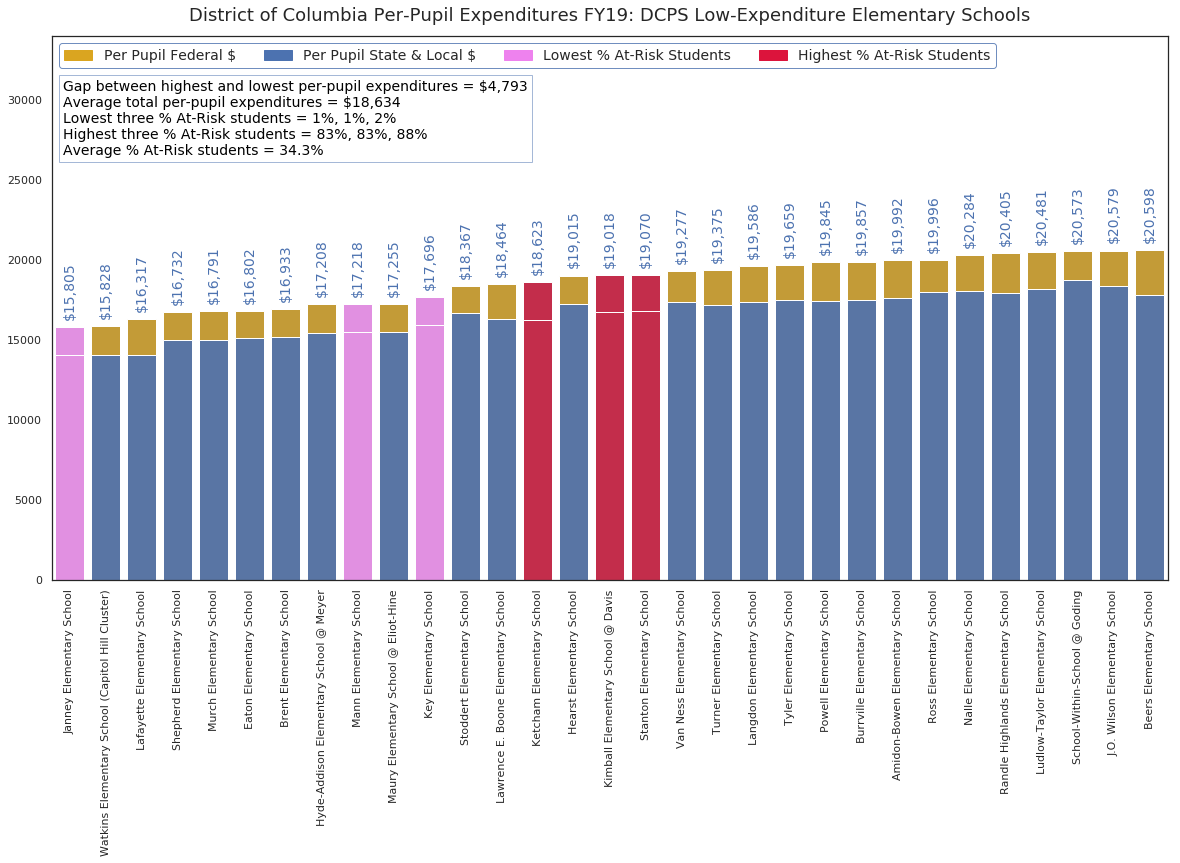

In [131]:
makegraph(elem_tps_low, subtitle = "DCPS Low-Expenditure Elementary Schools", maxheight=34000)

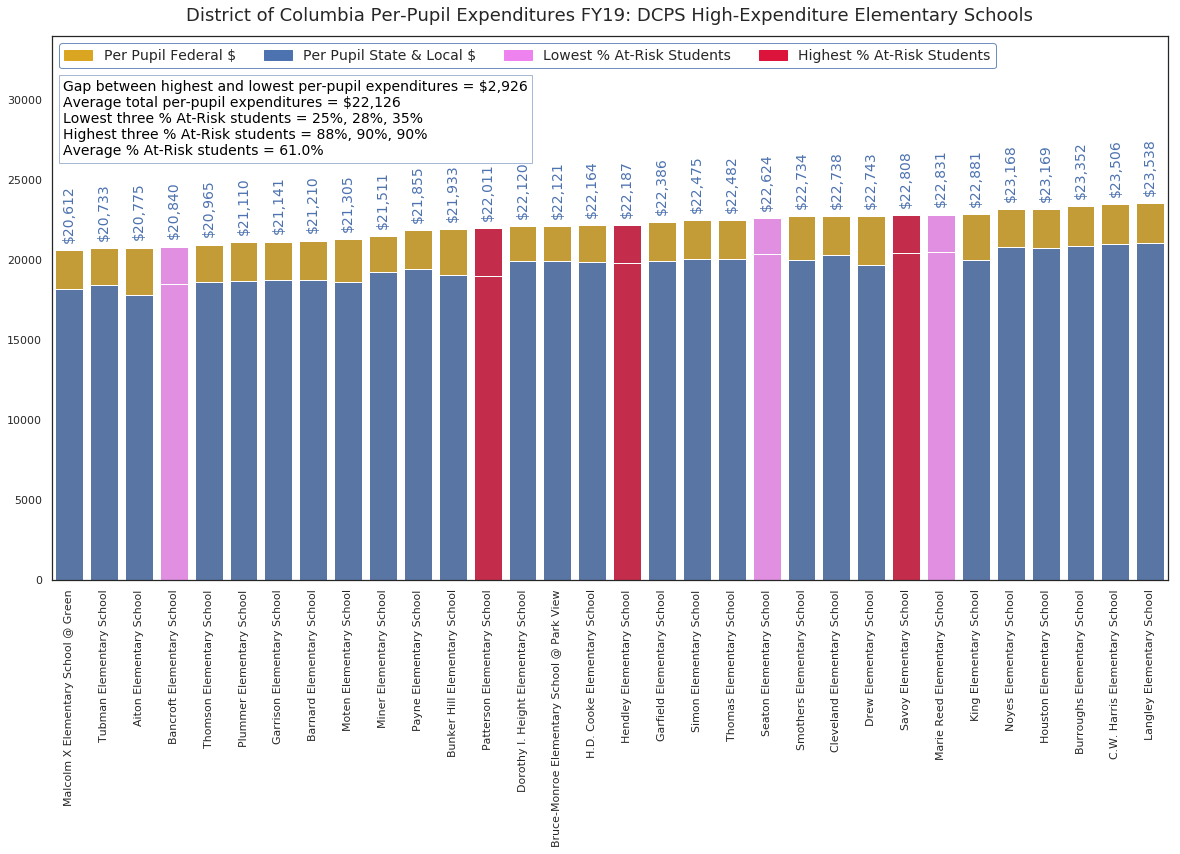

In [132]:
makegraph(elem_tps_hi, subtitle = "DCPS High-Expenditure Elementary Schools", maxheight=34000)

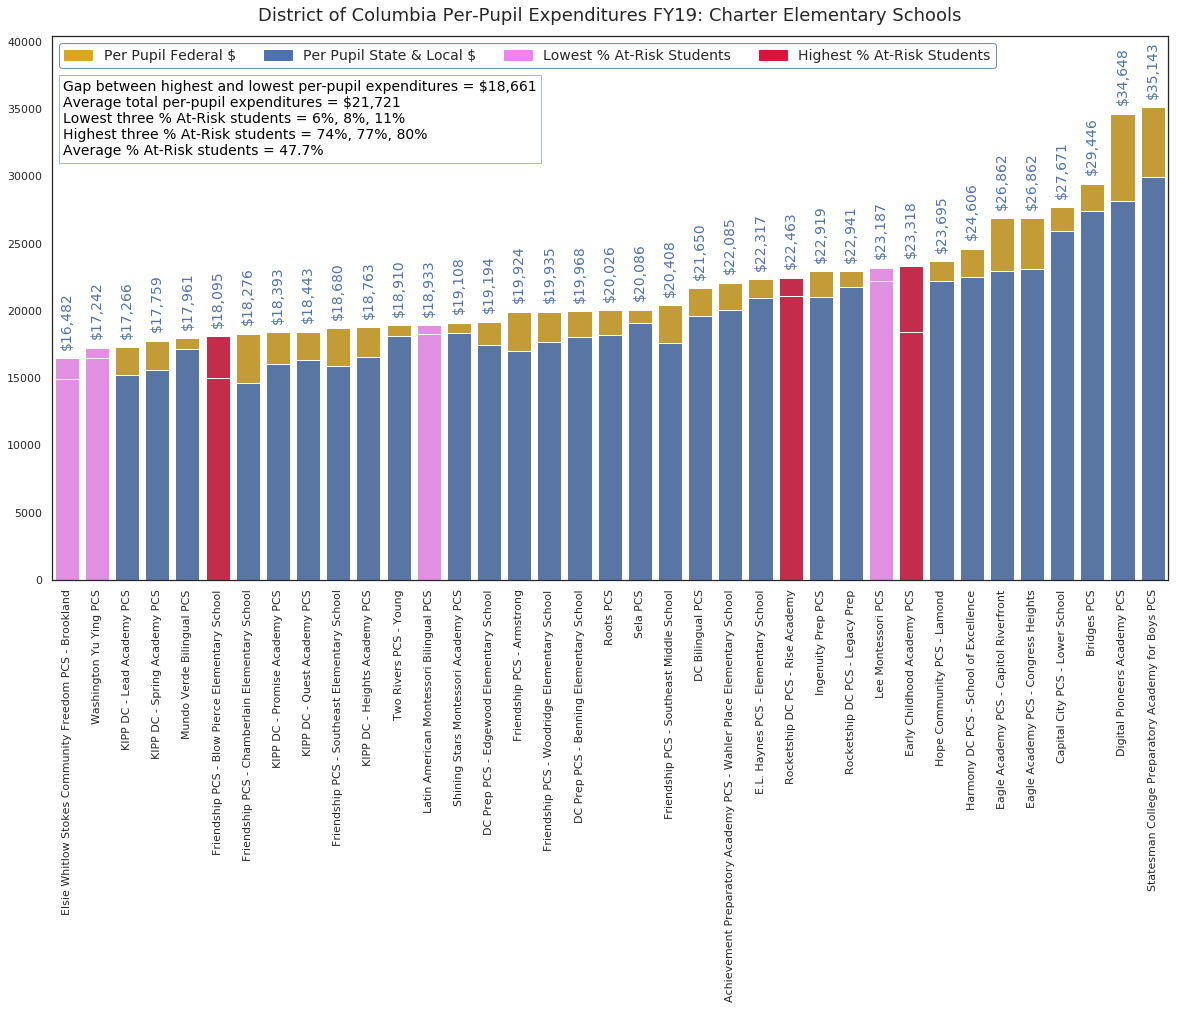

In [123]:
makegraph(elem_ch, subtitle = "Charter Elementary Schools")

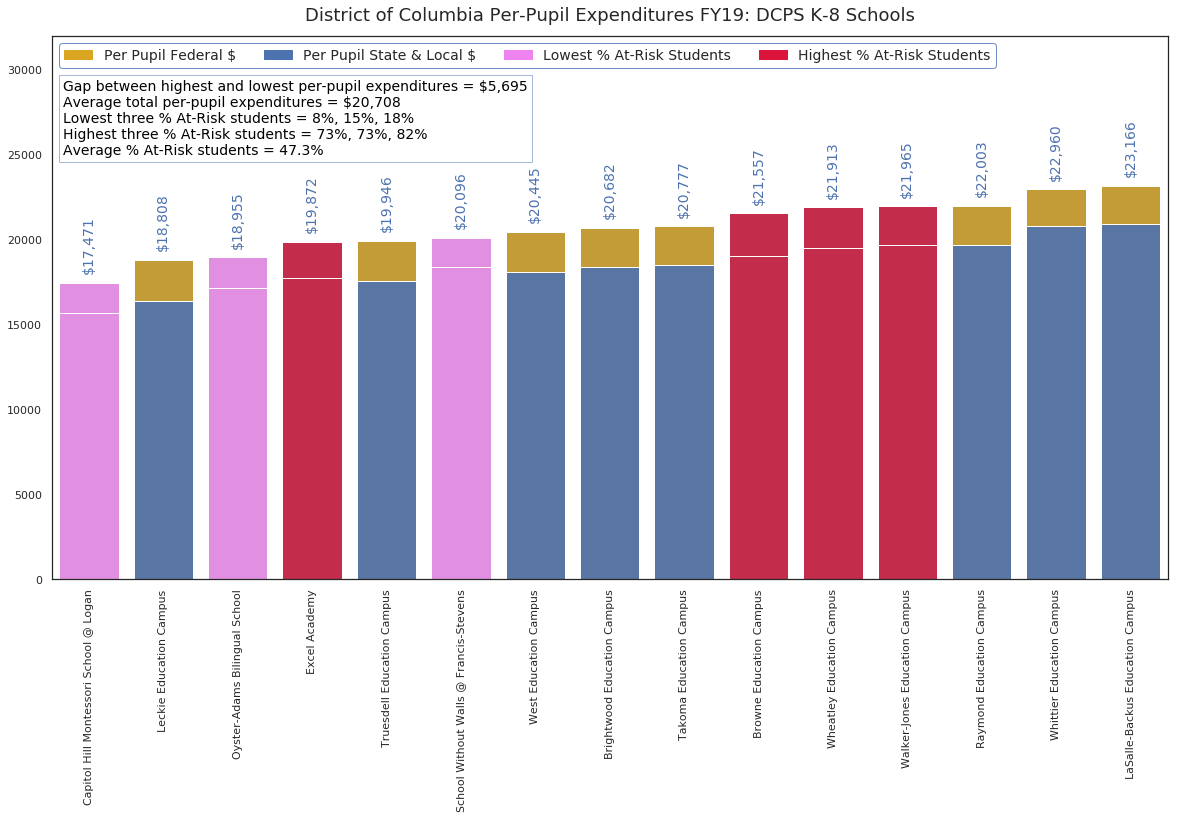

In [125]:
makegraph(k8_tps, subtitle = "DCPS K-8 Schools", maxheight=32000)

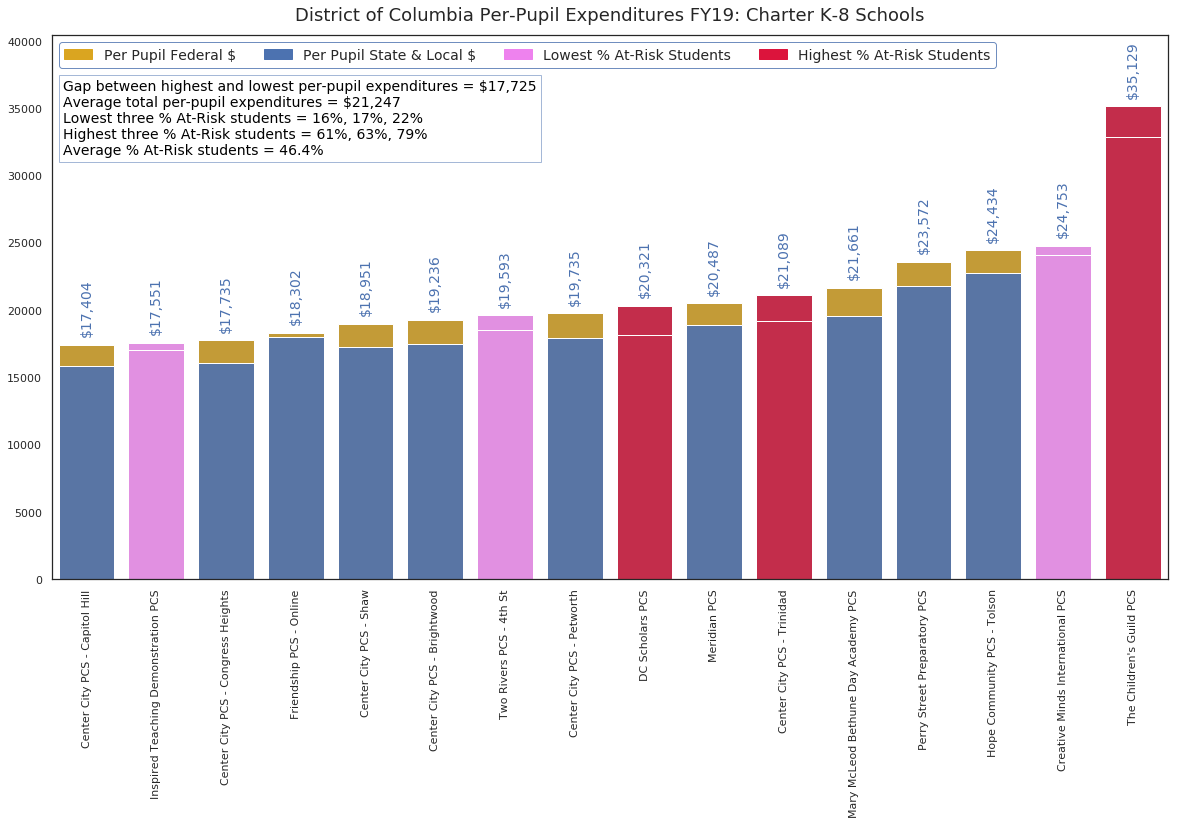

In [126]:
makegraph(k8_ch, subtitle = "Charter K-8 Schools")

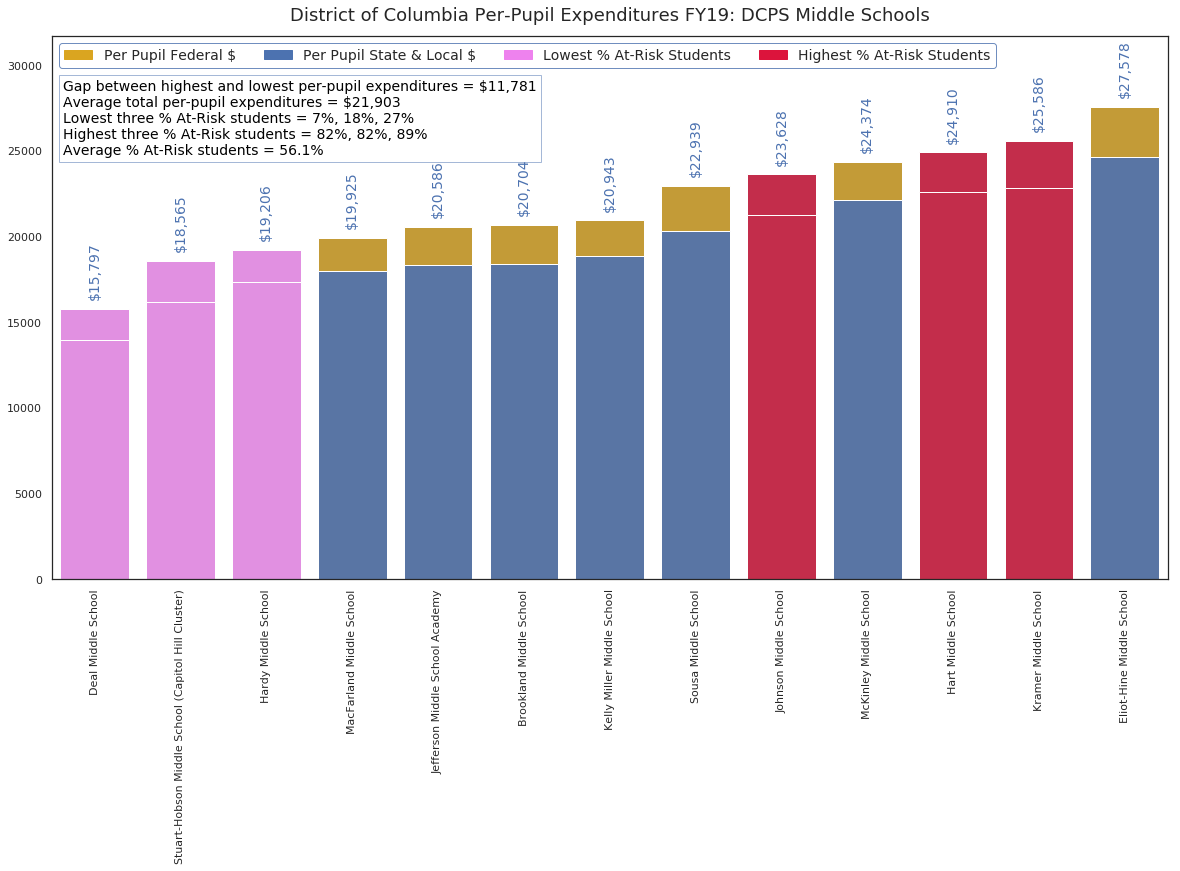

In [127]:
makegraph(middle_tps, subtitle = "DCPS Middle Schools")

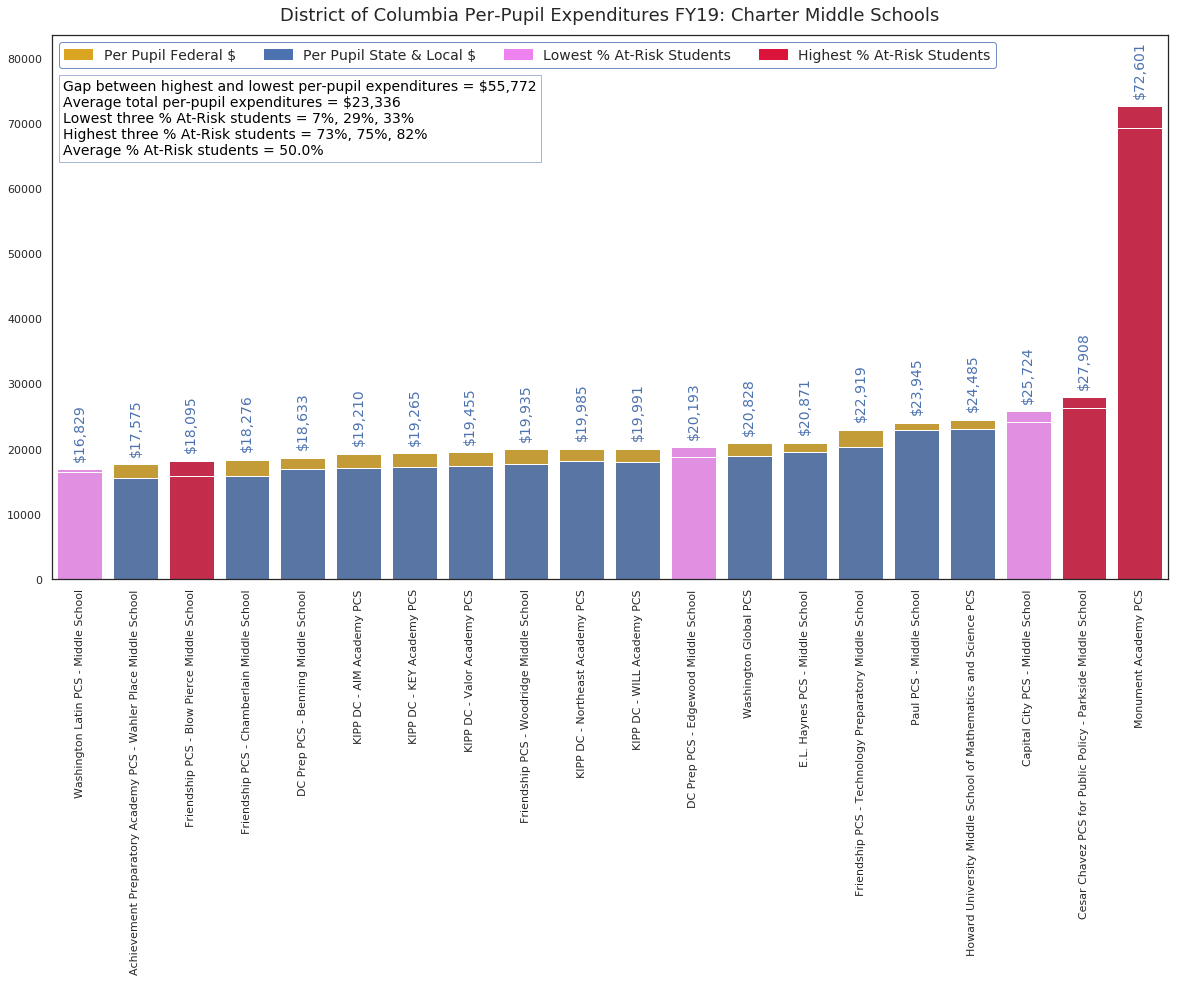

In [128]:
makegraph(middle_ch, subtitle = "Charter Middle Schools")

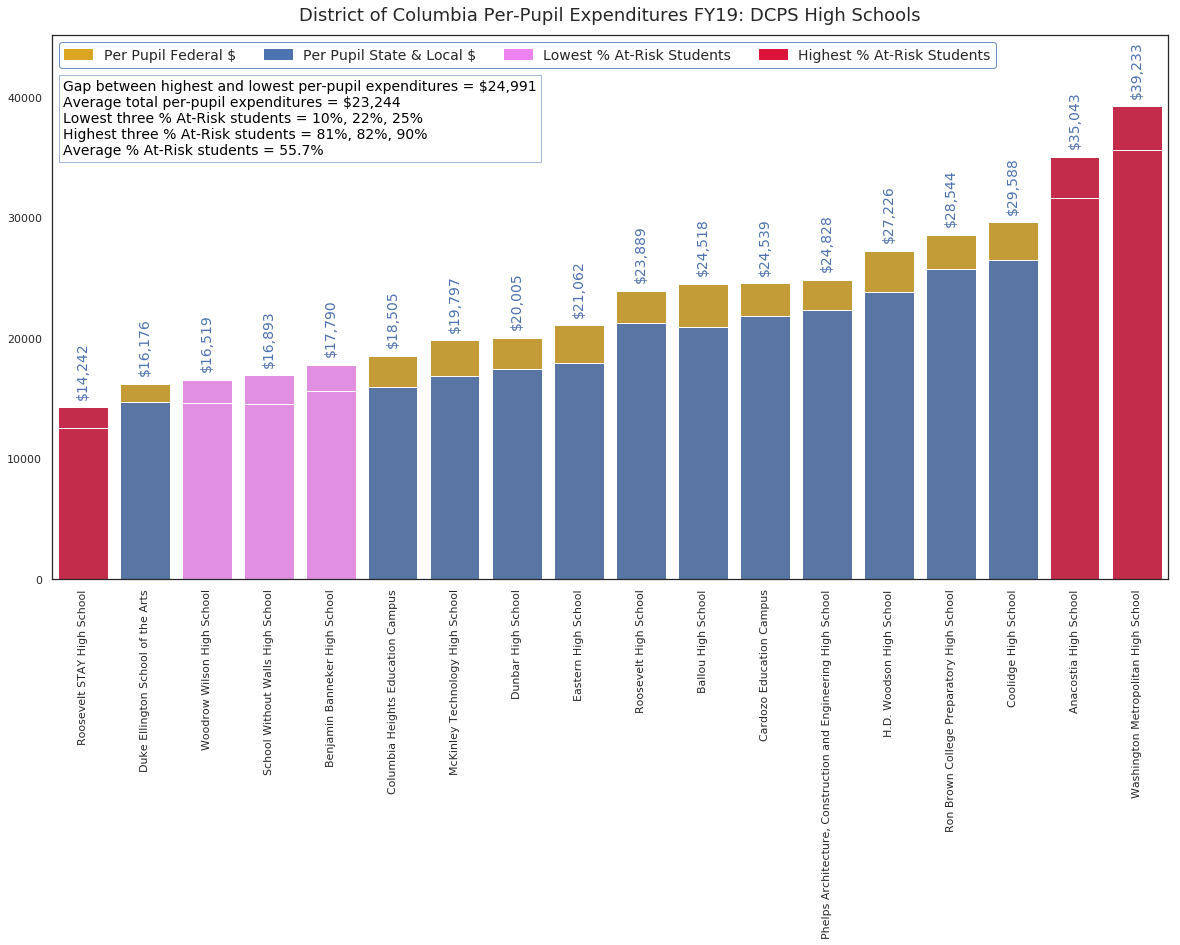

In [129]:
makegraph(high_tps, subtitle = "DCPS High Schools")

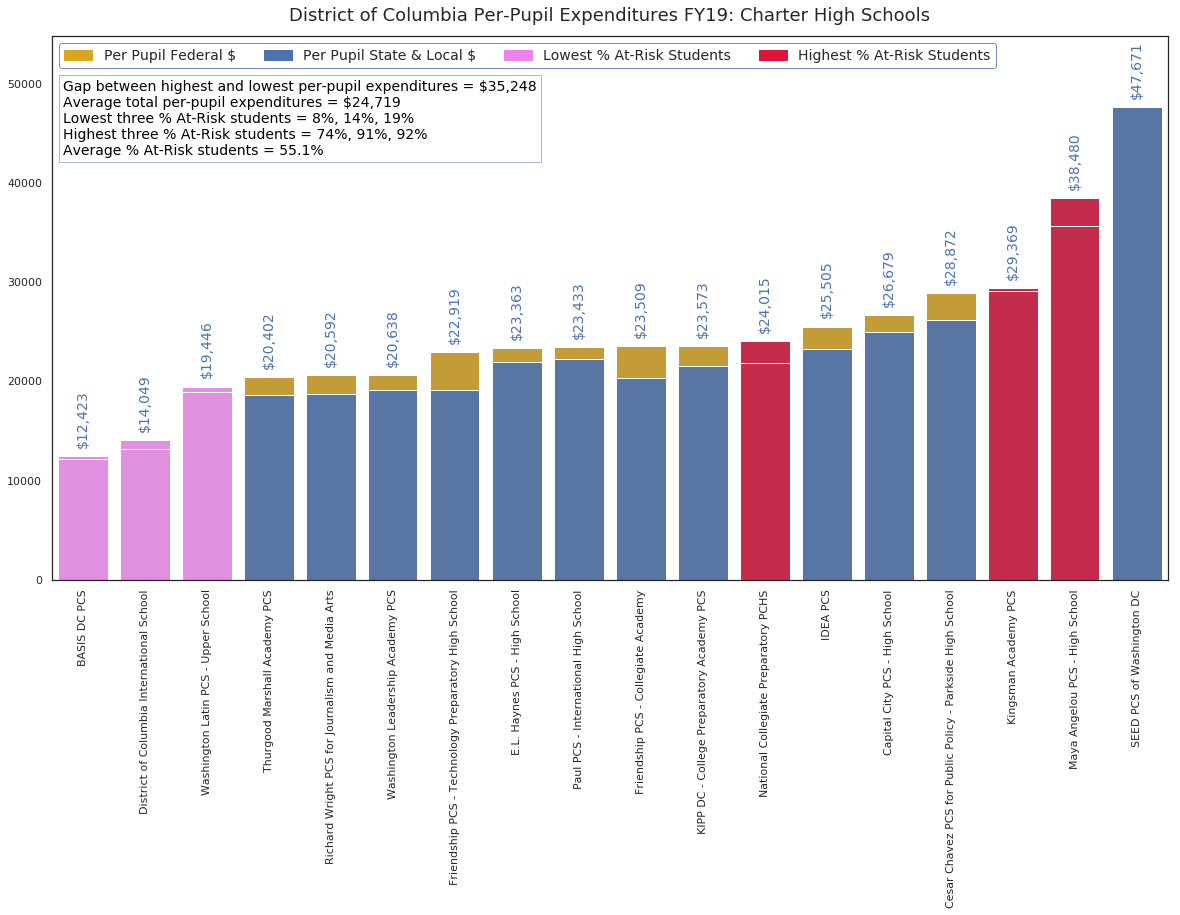

In [130]:
makegraph(high_ch, subtitle = "Charter High Schools")

## Visualize by poverty quintiles

### Split by poverty quintiles

In [50]:
# Find quintiles by percent At-Risk students
q20 = df["Percent Enrolled"].quantile(q=0.2)
q40 = df["Percent Enrolled"].quantile(q=0.4)
q60 = df["Percent Enrolled"].quantile(q=0.6)
q80 = df["Percent Enrolled"].quantile(q=0.8)

print("Min/max:", str(df["Percent Enrolled"].min()) + ",", (df["Percent Enrolled"].max()))
print("Quintiles:", str(q20) + ",", str(q40) + ",", str(q60) + ",", str(q80))

Min/max: 1, 92
Quintiles: 25.800000000000004, 47.0, 59.0, 72.20000000000002


In [51]:
# Separate DF into quintiles 
df20 = df[df["Percent Enrolled"] <= q20].sort_values(by="Total Per-Pupil Expenditure", ascending=True).reset_index()
df40 = df[df["Percent Enrolled"].apply(lambda x: x > q20 and x <= q40)].sort_values(by="Total Per-Pupil Expenditure", ascending=True).reset_index()
df60 = df[df["Percent Enrolled"].apply(lambda x: x > q40 and x <= q60)].sort_values(by="Total Per-Pupil Expenditure", ascending=True).reset_index()
df80 = df[df["Percent Enrolled"].apply(lambda x: x > q60 and x <= q80)].sort_values(by="Total Per-Pupil Expenditure", ascending=True).reset_index()
df100 = df[df["Percent Enrolled"] > q80].sort_values(by="Total Per-Pupil Expenditure", ascending=True).reset_index()

In [52]:
df20

,index,LEA Code,LEA Name,School Code,School Name,Entity Type,Ward,Percent Enrolled,Total Count of Students,Short Name,...,Total School Level Expenditure,School Level: State/Local,School Level: Federal,Centralized Expenditures,Centralized Expenditures: State/Local,Centralized Expenditures: Federal,Highest Grade,Lowest Grade,Accountability Framework,Level
0,219,168,Basis DC PCS,3068,BASIS DC PCS,Charter,2,8,642,BASIS DC PCS,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,5.0,High School,High School
1,230,181,District of Columbia International School,248,District of Columbia International School,Charter,4,19,1066,District of Columbia International School,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,6.0,High School,High School
2,94,001,District of Columbia Public Schools,405,Deal Middle School,DCPS,3,7,1549,Deal Middle School,...,8922.0,8570.0,352.0,6875.0,5377.0,1498.0,8.0,6.0,Middle School,Middle School
3,23,001,District of Columbia Public Schools,254,Janney Elementary School,DCPS,3,1,748,Janney Elementary School,...,8930.0,8638.0,292.0,6875.0,5377.0,1498.0,5.0,-1.0,Elementary School,Elementary School
4,77,001,District of Columbia Public Schools,333,Watkins Elementary School (Capitol Hill Cluster),DCPS,6,21,460,Watkins Elementary School (Capitol Hill,...,8953.0,8677.0,275.0,6875.0,5377.0,1498.0,5.0,1.0,Elementary School,Elementary School
5,27,001,District of Columbia Public Schools,261,Lafayette Elementary School,DCPS,4,4,904,Lafayette Elementary School,...,9442.0,8695.0,746.0,6875.0,5377.0,1498.0,5.0,-1.0,Elementary School,Elementary School
6,191,144,Elsie Whitlow Stokes Community Freedom PCS,159,Elsie Whitlow Stokes Community Freedom PCS - B...,Charter,5,11,352,Elsie Whitlow Stokes Community Freedom,...,14564.0,14459.0,105.0,1918.0,445.0,1474.0,5.0,-2.0,Elementary School,Elementary School
7,119,001,District of Columbia Public Schools,463,Woodrow Wilson High School,DCPS,3,22,1895,Woodrow Wilson High School,...,9644.0,9241.0,402.0,6875.0,5377.0,1498.0,12.0,9.0,High School,High School
8,57,001,District of Columbia Public Schools,313,Shepherd Elementary School,DCPS,4,12,396,Shepherd Elementary School,...,9857.0,9588.0,269.0,6875.0,5377.0,1498.0,5.0,-2.0,Elementary School,Elementary School
9,40,001,District of Columbia Public Schools,287,Murch Elementary School,DCPS,3,5,642,Murch Elementary School,...,9916.0,9587.0,329.0,6875.0,5377.0,1498.0,5.0,-1.0,Elementary School,Elementary School


### Barplots

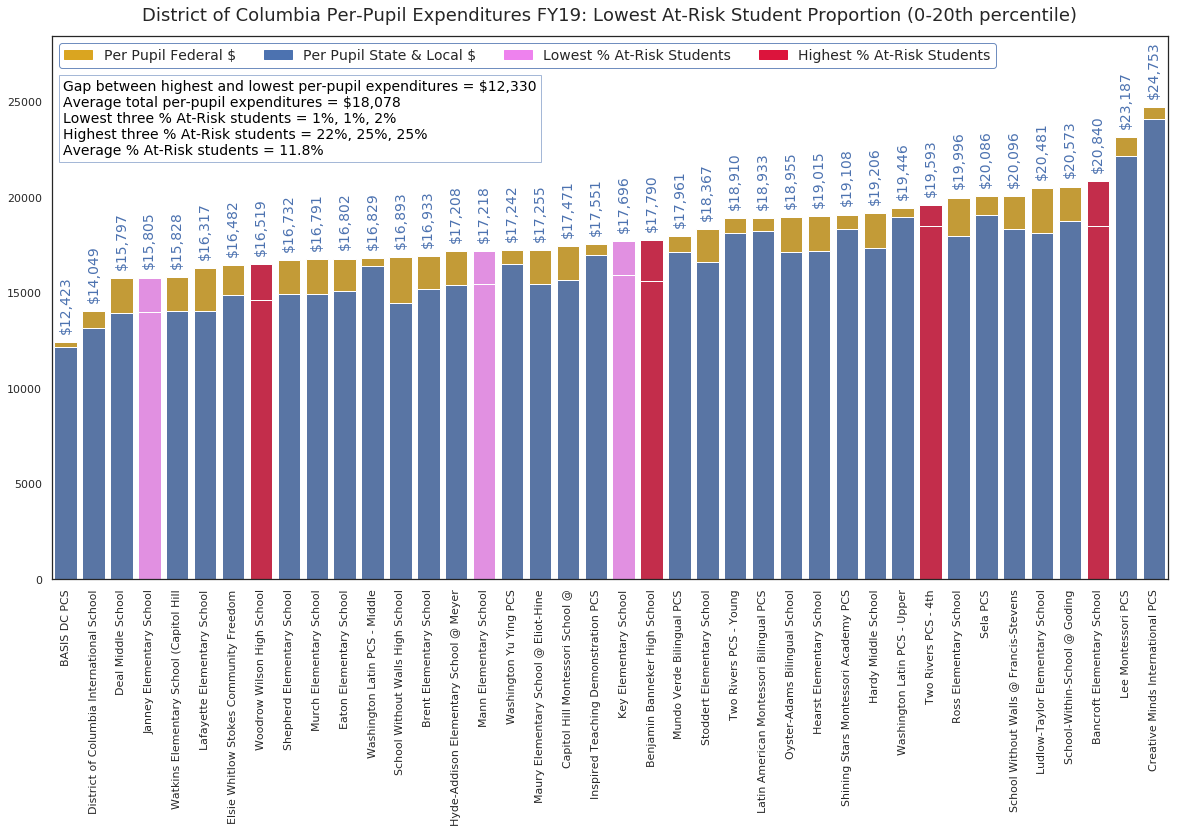

In [53]:
makegraph(df20, subtitle = "Lowest At-Risk Student Proportion (0-20th percentile)", idcol = "Short Name")

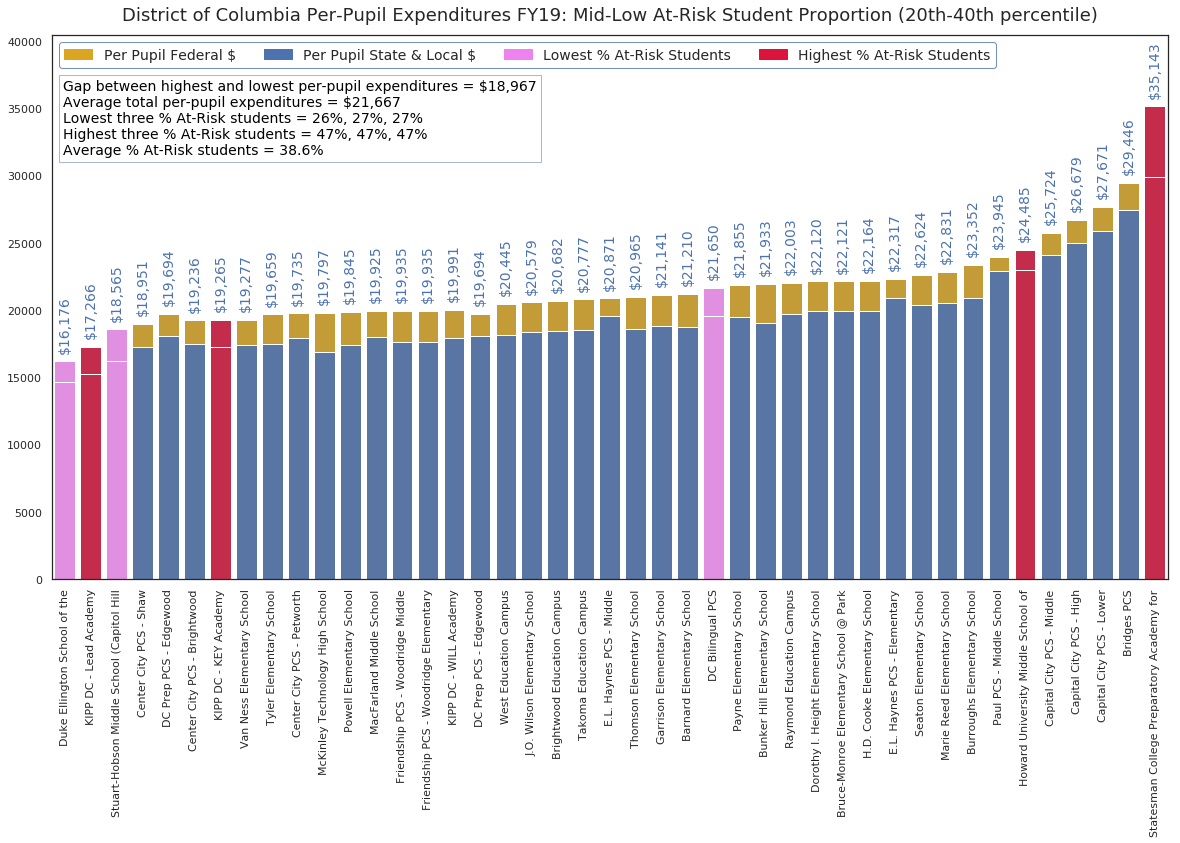

In [54]:
makegraph(df40, subtitle = "Mid-Low At-Risk Student Proportion (20th-40th percentile)", idcol = "Short Name")

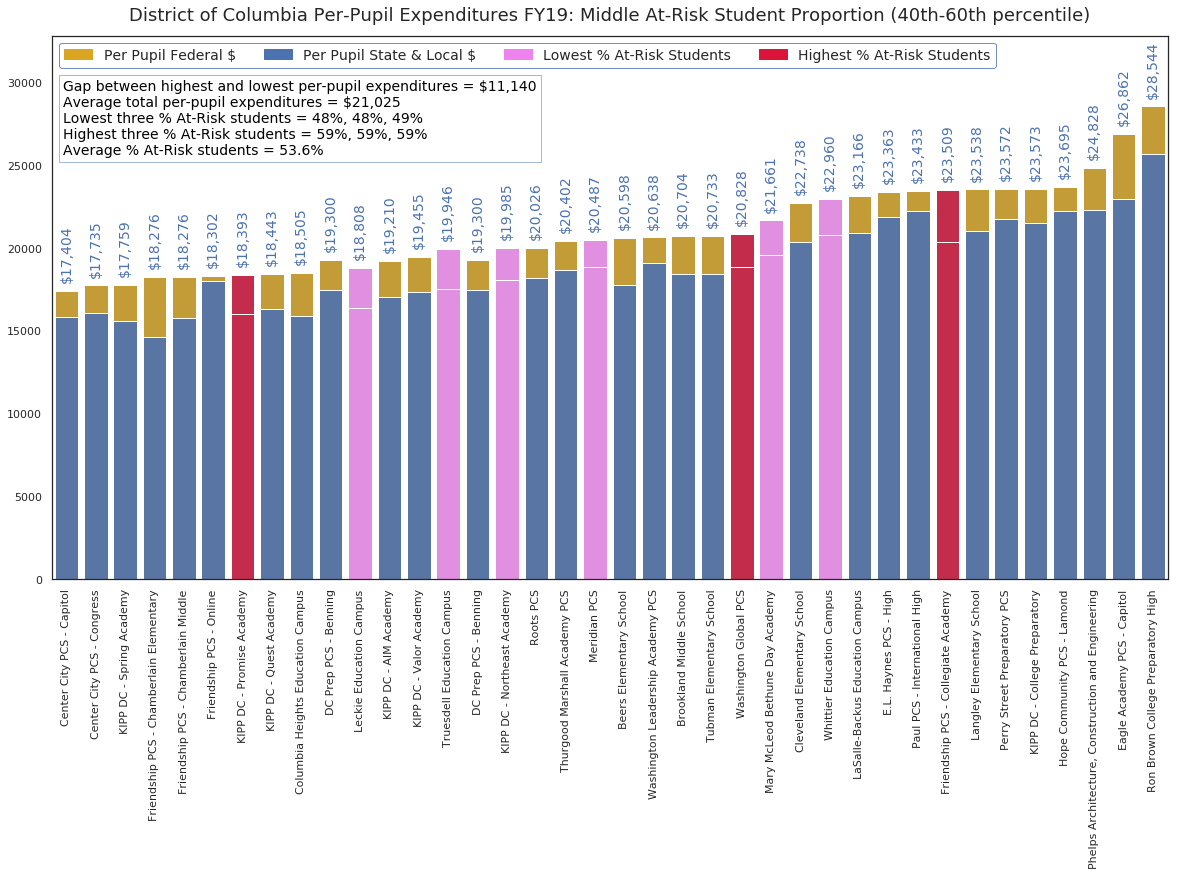

In [55]:
makegraph(df60, subtitle = "Middle At-Risk Student Proportion (40th-60th percentile)")

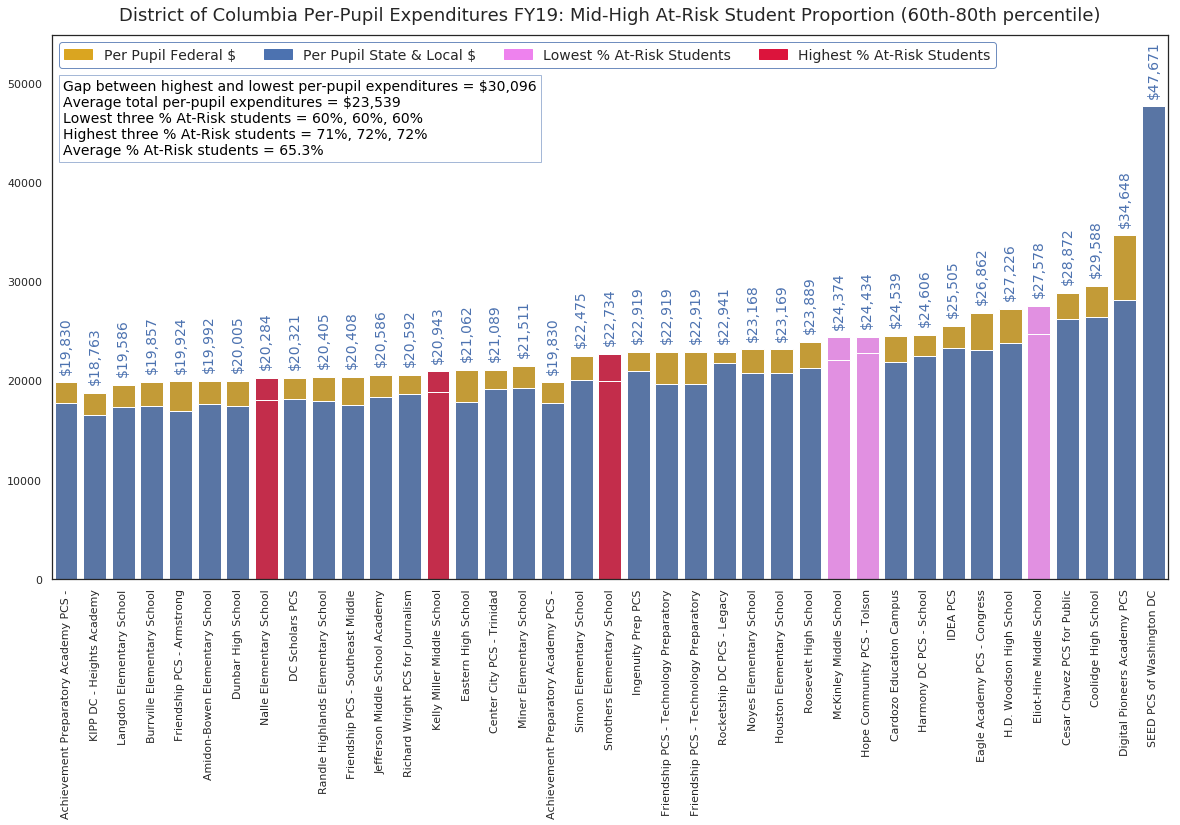

In [56]:
makegraph(df80, subtitle = "Mid-High At-Risk Student Proportion (60th-80th percentile)")

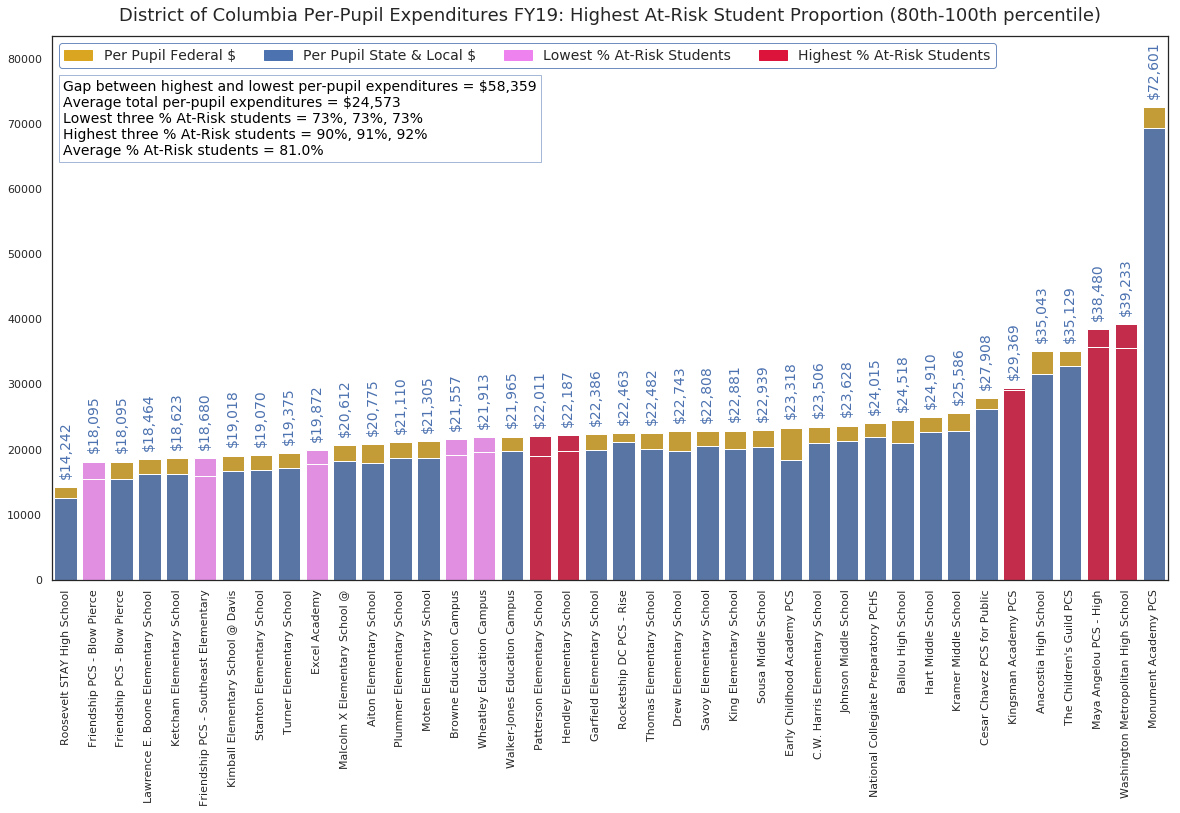

In [57]:
makegraph(df100, subtitle = "Highest At-Risk Student Proportion (80th-100th percentile)")